In [ ]:
%pip install opencv-python

  Using cached opencv_python-4.7.0.72-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (61.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
%cd /content/GP_try/test

/content/GP_try/test


In [1]:
import sys; sys.path.append("../")
from feature_extractor import FeatureExtractor
import torch
import numpy as np
import time
from cascade import CascadeClassifier
import cv2
import joblib


In [2]:
torch.cuda.is_available()

True

In [6]:
!mkdir ../new_data5/
!cp -r /content/drive/MyDrive/GP/GP_try/new_data5/* ../new_data5/

In [7]:
!ls ../new_data5/test/face -1 | wc -l
!ls ../new_data5/test/non-face -1 | wc -l
!ls ../new_data5/train/face -1 | wc -l
!ls ../new_data5/train/non-face -1 | wc -l

905
1810
3618
7236


In [8]:
!mkdir ../no_faces/
!cp -r /content/drive/MyDrive/SBI/SelfBlendedImages/no_faces/* ../no_faces/

In [9]:
!ls /content/drive/MyDrive/SBI/SelfBlendedImages/no_faces -1 | wc -l

1000


In [12]:
!mkdir ../hFeatures5_5

In [3]:
parent = '../hFeatures5_6/'
data_path = 'new_data5'

# Features Extraction

In [5]:
mean = 111.02404842061983
std = 56.926623499738575

In [4]:
def transform1(img):
  return img
  # img = (img - img.mean()) / (img.std() + 1e-8)
  # return cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

In [5]:
shape=(10, 10)

In [6]:

feature_extractor = FeatureExtractor(shape=shape,
                                     percentile=100,
                                     batch_size=500,
                                     verbose=False,
                                     all_features_file=parent + "all_features.npz",
                                     selected_features_file=parent + "selected_features.npz",
                                     labels_file=parent + "labels.npy",
                                     indecies_file=parent + "indecies.npy",)

In [7]:
class Data:pass
data = Data() # to be able to add attributes to it (data.X, data.y). This is to avoid copying the data in memory

In [8]:

# X, y = feature_extractor.extractFeatures(pos_path='../'+data_path+'/train/face',
data.X, data.y = feature_extractor.extractFeatures(pos_path='../'+data_path+'/train/face',
                                  neg_path='../'+data_path+'/train/non-face',
                                  transform=transform1,
                                  save_to_file=False)
print('done')


done


In [ ]:
import gc
gc.collect()

49

In [ ]:
# del feature_extractor.f2
# del feature_extractor.f3
# del feature_extractor.f4

In [ ]:
# indecies, X = feature_extractor.selectPercentile(X, y )
# # y = np.load(parent + 'labels.npy')
# print(X.shape, y.shape)
# print('done')


Now selecting percentile features
(12792, 10854) (10854,)
done


In [ ]:
# feature_extractor.f2, feature_extractor.f3, feature_extractor.f4 = feature_extractor.describe_features(feature_extractor.shape)

In [11]:
# temp = np.load('../hFeatures3/all_features.npz')['arr_0']
temp = data.X
temp

array([[-14.,  -4.,  -9., ...,  -2.,   3.,  -2.],
       [ 12.,   4., -21., ...,   1.,  -9.,  -5.],
       [ -7.,  30., -95., ...,  -8.,   5.,   3.],
       ...,
       [-49.,  80.,  15., ...,   3.,  18.,  37.],
       [-16.,  56.,  18., ...,   1.,   6.,   7.],
       [ -6.,   2., -23., ...,   1.,   1.,   5.]], dtype=float32)

In [12]:
print(temp.min())
print(temp.max())
print(temp[3])
print(temp[4])

-10378.0
10491.0
[ 17.   6. -64. ...   1. -15.  -7.]
[ 109.  229. -208. ...  -15.   20.  -15.]


# Training

In [ ]:
!mkdir /content/drive/MyDrive/GP/GP_try/hFeatures5_4/

mkdir: cannot create directory ‘/content/drive/MyDrive/GP/GP_try/hFeatures5_4/’: File exists


In [13]:
face_detect_dict = {
    "feature_extractor":feature_extractor,
    "window_size":shape,
    "scale_dist":1.25,
    "max_size":500,
    "min_size":50,
    "stride":10,
    "device":torch.device('cuda' if torch.cuda.is_available() else 'cpu'),
    "normalize_subwindows":False,
    "calc_conf":False
}

In [15]:
more_neg_dict = {
    "more_neg_path":'../../FF++/no_faces/',
    "n_per_img":20,
    "req_cnt":6000,
    "by_confidence":True,
    "by_size":True,
    "resize_factor":0.25,
    "face_dict":face_detect_dict
}

In [16]:
s_t = time.time()
cascadeClassifier= CascadeClassifier(batchsize=500,
                                     verbose=True,
                                     layers=[50]*3)

face_detect_dict['classifier'] = cascadeClassifier
s = '/content/drive/MyDrive/GP/GP_try/hFeatures5_6/'
tr_acc = cascadeClassifier.train(data=data, equal_weights=False,print_accuracy=True,more_neg_dict=more_neg_dict)

cascadeClassifier.save(parent + 'cascadeClassifier.pkl')

print('accuracy: ', tr_acc)
print('time taken: ', time.time() - s_t, 's')
print('done')

Training strong classifier 001:   0%|          | 0/50 [00:00<?, ?it/s]

Training strong classifier 001: 100%|██████████| 50/50 [00:27<00:00,  1.79it/s]


For layer 1 accuracy is 0.9673852957435047


Images:  18%|█▊        | 185/1000 [00:21<01:36,  8.47it/s]


Added 5773 negative samples, Total negatives:  6008


Training strong classifier 002: 100%|██████████| 50/50 [00:23<00:00,  2.15it/s]


For layer 2 accuracy is 0.8967380012466237


Images:  30%|██▉       | 297/1000 [00:32<01:17,  9.02it/s]


Added 5156 negative samples, Total negatives:  5765


Training strong classifier 003: 100%|██████████| 50/50 [00:22<00:00,  2.25it/s]


For layer 3 accuracy is 0.8480230203559629
accuracy:  None
time taken:  128.79187202453613 s
done


In [17]:
print(data.X.shape)
print(data.y.shape)
print(np.sum(data.y==1))
print(np.sum(data.y!=1))

(5025, 9383)
(9383,)
3618
5765


In [18]:
cascadeClassifier.save_joblib(parent + 'cascadeClassifier.joblib')

In [19]:
joblib.dump(feature_extractor, parent + 'feature_extractor.joblib')

['../hFeatures5_6/feature_extractor.joblib']

In [14]:
!cp -r ../hFeatures5_5/ /content/drive/MyDrive/GP/GP_try/hFeatures5_5/

In [ ]:
# import pickle as pkl
# with open(parent + 'cascadeClassifier.pkl', 'rb') as f:
#   cascadeClassifier = pkl.load(f)

# Testing

In [20]:
# accuracy imports
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


In [21]:
s_t = time.time()
t_f_idx_map, t_features, t_labels = feature_extractor.extractFeaturesByIndecies(pos_path='../'+data_path+'/test/face',
                                            neg_path='../'+data_path+'/test/non-face',
                                            cascadeClassifier=cascadeClassifier,
                                            transform=transform1,
                                            use_percentile=False,)
print(t_features.shape, t_labels.shape)
predictions = cascadeClassifier.predict(t_features, t_f_idx_map)
print('test accuracy: ', np.sum(predictions == t_labels) / t_labels.shape[0])
print('time taken: ', time.time() - s_t, 's')

(142, 2715) (2715,)
test accuracy:  0.939963167587477
time taken:  4.754623174667358 s


In [22]:
# report
print('accuracy: ', accuracy_score(t_labels, predictions))
print('f1 score macro: ', f1_score(t_labels, predictions, average='macro'))
print('f1 score binary: ', f1_score(t_labels, predictions))
print('f1 score micro: ', f1_score(t_labels, predictions, average='micro'))
print('precision: ', precision_score(t_labels, predictions))
print('recall: ', recall_score(t_labels, predictions))
print('confusion matrix: \n', confusion_matrix(t_labels, predictions))
print('classification report: \n', classification_report(t_labels, predictions, digits=4))


accuracy:  0.939963167587477
f1 score macro:  0.9290209625895909
f1 score binary:  0.9011522134627047
f1 score micro:  0.939963167587477
precision:  0.9986559139784946
recall:  0.8209944751381215
confusion matrix: 
 [[1809    1]
 [ 162  743]]
classification report: 
               precision    recall  f1-score   support

           0     0.9178    0.9994    0.9569      1810
           1     0.9987    0.8210    0.9012       905

    accuracy                         0.9400      2715
   macro avg     0.9582    0.9102    0.9290      2715
weighted avg     0.9448    0.9400    0.9383      2715



# Try full image

In [ ]:
# !mkdir /content/drive/MyDrive/GP/GP_try/hFeatures8
# !cp -r ../hFeatures8/* /content/drive/MyDrive/GP/GP_try/hFeatures8

mkdir: cannot create directory ‘/content/drive/MyDrive/GP/GP_try/hFeatures5_3’: File exists


In [18]:
!mkdir ../../lfw_all
!cp /content/drive/MyDrive/GP/lfw_all/* ../../lfw_all/

In [ ]:
!mkdir ../../ff_all
!cp /content/drive/MyDrive/SBI/SelfBlendedImages/full_frames/* ../../ff_all/

In [35]:
import random
# from detect_face import FaceDetector
from PIL import Image
import os
import matplotlib.pyplot as plt
dset_path='../../FF++/full_frames/'
# dset_path = '../../ff_all/'
# dset_path = '../../lfw_all/'
all_images_names = os.listdir(dset_path)
# all_images_names = sorted(all_images_names)
random.shuffle(all_images_names)
all_images_names = [dset_path + name for name in all_images_names]
all_images_names[0]

'../../FF++/full_frames/215..png'

In [36]:
show_images = list(range(0, 20))
rectangles_only = True
# resize_to = (100, 100)
random.shuffle(all_images_names)

In [37]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [26]:
feature_extractor.verbose = False

In [28]:
from copy import deepcopy

In [27]:
import joblib

In [29]:
cascadeClassifier2 = joblib.load('../hFeatures5_6/cascadeClassifier.joblib')
feature_extractor2 = joblib.load('../hFeatures5_6/feature_extractor.joblib')

In [ ]:
from importlib import reload
import detect_face
reload(detect_face)
from detect_face import MinFaceDetector

In [30]:
from detect_face import MinFaceDetector
faceDetector = MinFaceDetector(cascadeClassifier2, \
                            feature_extractor2,\

                            window_size=shape,
                            scale_dist=1.25,
                            max_size=500,
                            min_size=50,
                            stride=10,

                            device=device,
                            use_percentile=False,
                            # makeθ0=False,

                            # verbose=False,
                            normalize_subwindows=True,
                            calc_conf=True,
                            # report_time=True,
                            # use_sklearn=False
                            )

In [32]:
# joblib.dump(faceDetector, '/content/drive/MyDrive/GP/GP_try/hFeatures5_6/faceDetector.joblib')
joblib.dump(faceDetector, '../hFeatures5_6/faceDetector.joblib')

['../hFeatures5_6/faceDetector.joblib']

In [33]:
import cv2
import numpy as np

RGB
(720, 1280, 3)
(240, 426)
{'Getting Subwindows': 0.0175936222076416, 'Resizing Subwindows': 0.004506111145019531, 'Normalize': 0.0025467872619628906, 'Extracting Features': 0.03942394256591797, 'Classifying': 0.028049707412719727, 'total': 0.09212017059326172}


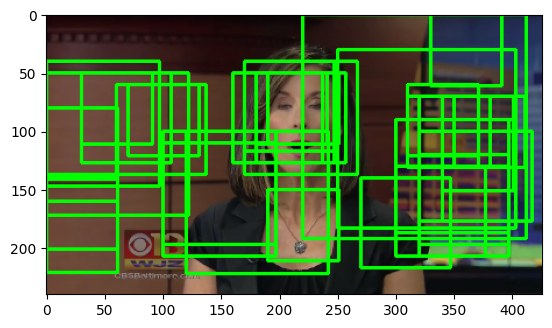

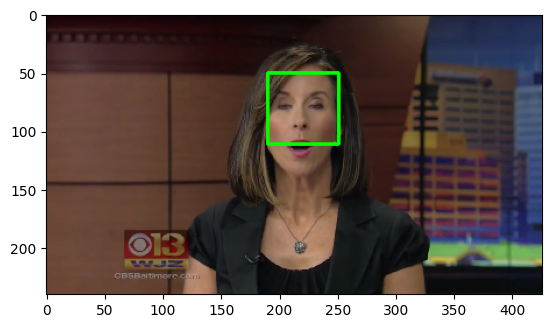

RGB
(480, 640, 3)
(160, 213)
{'Getting Subwindows': 0.003221273422241211, 'Resizing Subwindows': 0.0014100074768066406, 'Normalize': 0.0013611316680908203, 'Extracting Features': 0.0176236629486084, 'Classifying': 0.017386436462402344, 'total': 0.041002511978149414}


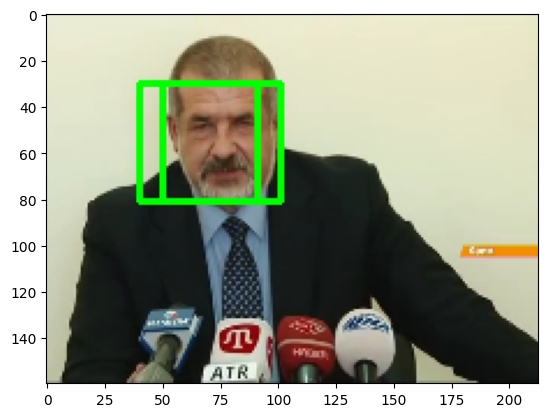

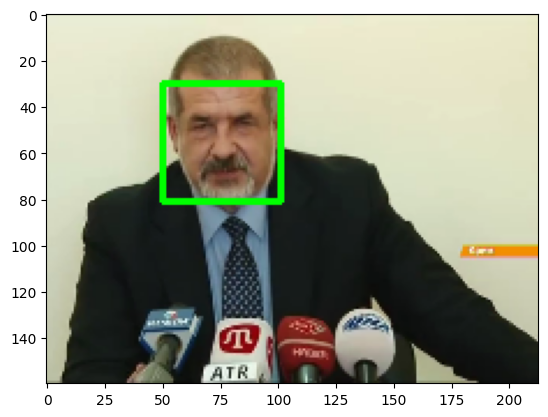

RGB
(720, 1280, 3)
(240, 426)
{'Getting Subwindows': 0.017812490463256836, 'Resizing Subwindows': 0.004105806350708008, 'Normalize': 0.002217531204223633, 'Extracting Features': 0.023814678192138672, 'Classifying': 0.026671409606933594, 'total': 0.07462191581726074}


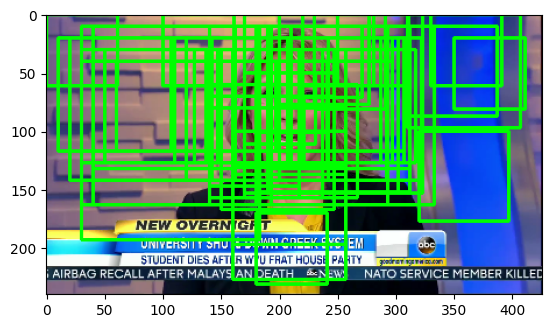

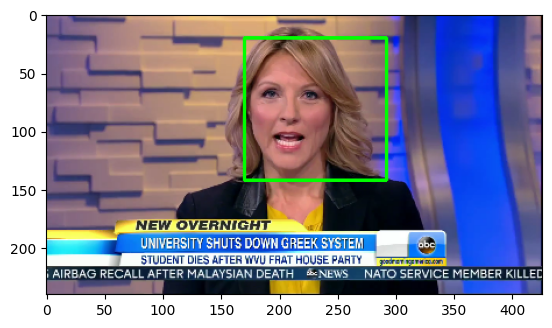

RGB
(720, 1280, 3)
(240, 426)
{'Getting Subwindows': 0.016708850860595703, 'Resizing Subwindows': 0.0047147274017333984, 'Normalize': 0.0025403499603271484, 'Extracting Features': 0.024278879165649414, 'Classifying': 0.02482151985168457, 'total': 0.07306432723999023}


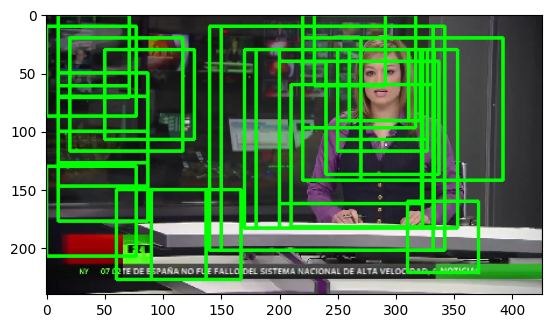

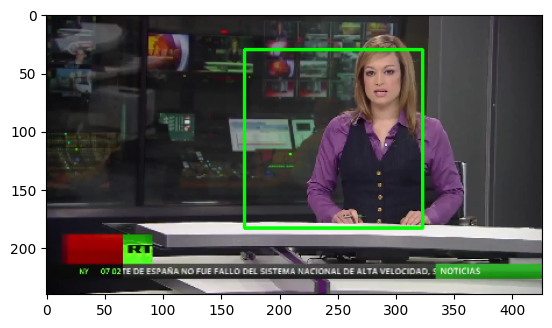

RGB
(480, 854, 3)
(160, 284)
{'Getting Subwindows': 0.029502391815185547, 'Resizing Subwindows': 0.002586841583251953, 'Normalize': 0.0017807483673095703, 'Extracting Features': 0.019674062728881836, 'Classifying': 0.0226900577545166, 'total': 0.07623410224914551}


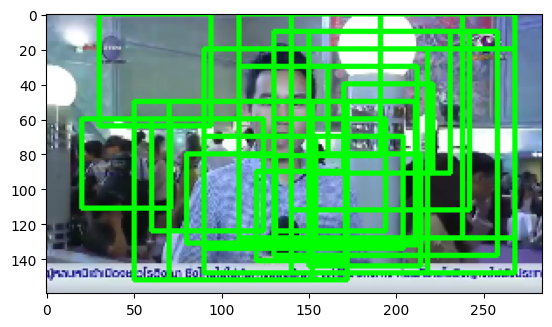

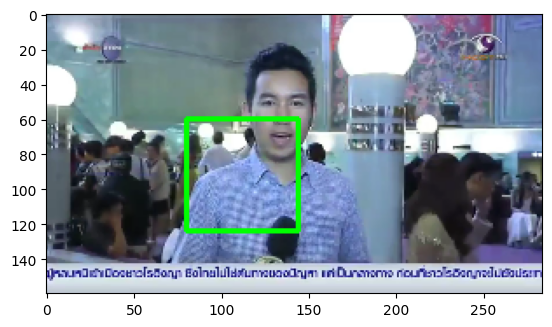

RGB
(720, 1280, 3)
(240, 426)
{'Getting Subwindows': 0.020395517349243164, 'Resizing Subwindows': 0.0045299530029296875, 'Normalize': 0.002414226531982422, 'Extracting Features': 0.0280759334564209, 'Classifying': 0.0291445255279541, 'total': 0.08456015586853027}


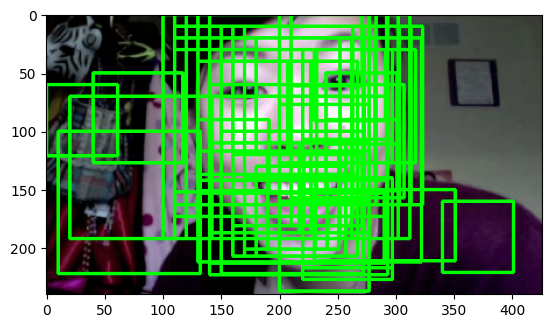

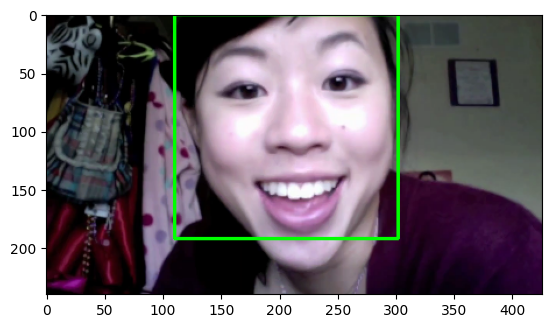

RGB
(720, 1280, 3)
(240, 426)
{'Getting Subwindows': 0.018836021423339844, 'Resizing Subwindows': 0.004168033599853516, 'Normalize': 0.0023431777954101562, 'Extracting Features': 0.02486419677734375, 'Classifying': 0.02896857261657715, 'total': 0.07918000221252441}


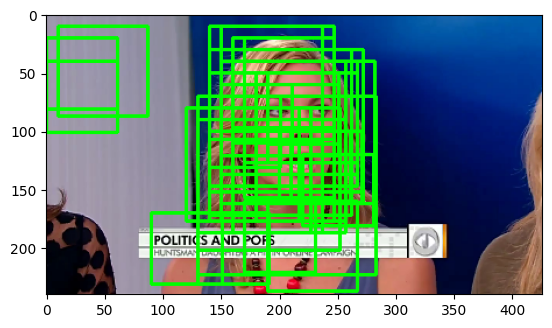

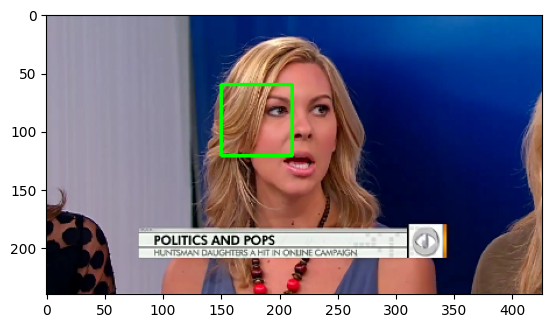

RGB
(480, 854, 3)
(160, 284)
{'Getting Subwindows': 0.0637362003326416, 'Resizing Subwindows': 0.014045953750610352, 'Normalize': 0.002039194107055664, 'Extracting Features': 0.01641392707824707, 'Classifying': 0.02047872543334961, 'total': 0.1167140007019043}


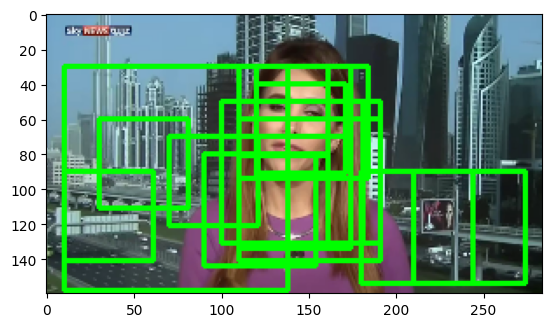

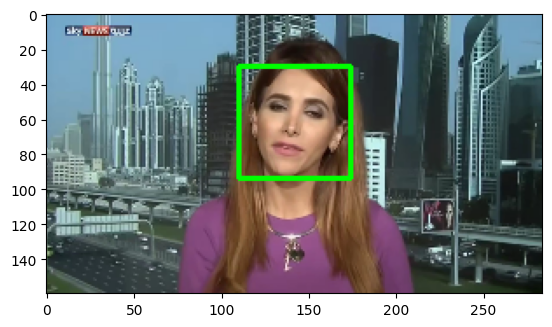

RGB
(480, 854, 3)
(160, 284)
{'Getting Subwindows': 0.013645648956298828, 'Resizing Subwindows': 0.0019664764404296875, 'Normalize': 0.0020656585693359375, 'Extracting Features': 0.020222902297973633, 'Classifying': 0.022666454315185547, 'total': 0.06056714057922363}


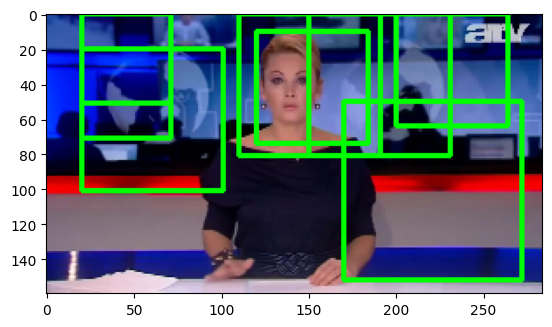

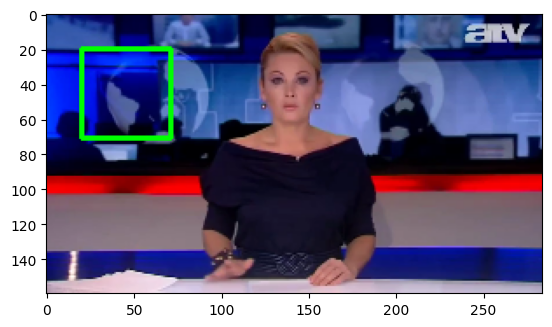

RGB
(720, 1280, 3)
(240, 426)
{'Getting Subwindows': 0.01749420166015625, 'Resizing Subwindows': 0.004550933837890625, 'Normalize': 0.0023801326751708984, 'Extracting Features': 0.025452375411987305, 'Classifying': 0.027907848358154297, 'total': 0.07778549194335938}


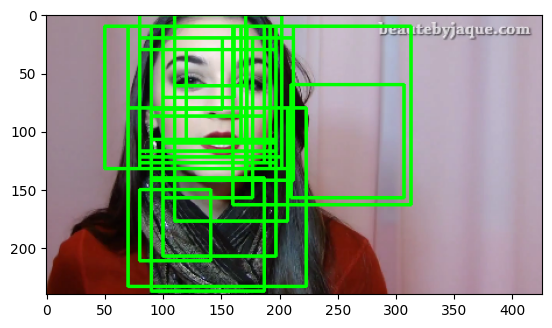

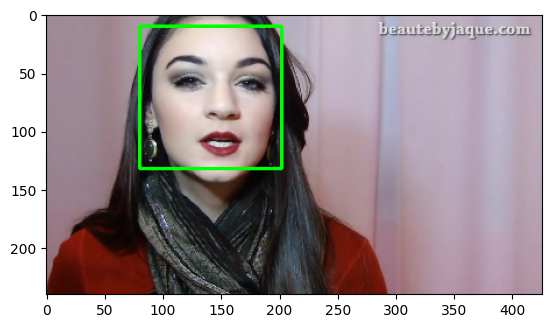

RGB
(480, 640, 3)
(160, 213)
{'Getting Subwindows': 0.04051375389099121, 'Resizing Subwindows': 0.02369546890258789, 'Normalize': 0.0016582012176513672, 'Extracting Features': 0.017843246459960938, 'Classifying': 0.02126932144165039, 'total': 0.1049799919128418}


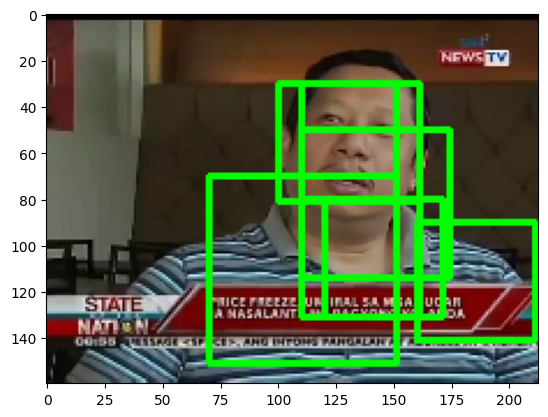

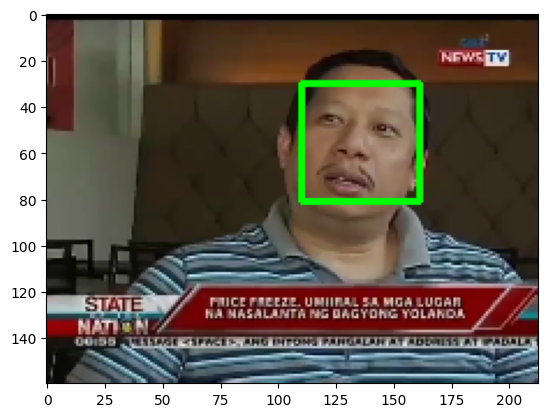

RGB
(480, 656, 3)
(160, 218)
{'Getting Subwindows': 0.02695775032043457, 'Resizing Subwindows': 0.0026710033416748047, 'Normalize': 0.0018117427825927734, 'Extracting Features': 0.021454334259033203, 'Classifying': 0.022186756134033203, 'total': 0.07508158683776855}


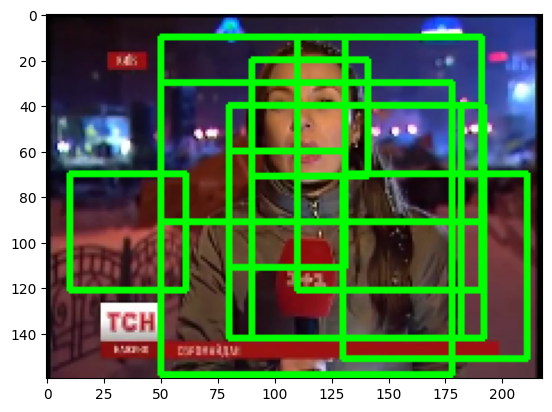

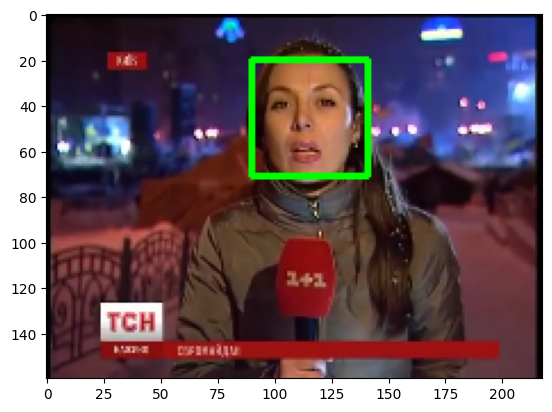

RGB
(480, 656, 3)
(160, 218)
{'Getting Subwindows': 0.003299713134765625, 'Resizing Subwindows': 0.001535177230834961, 'Normalize': 0.0013761520385742188, 'Extracting Features': 0.016453027725219727, 'Classifying': 0.017081737518310547, 'total': 0.03974580764770508}


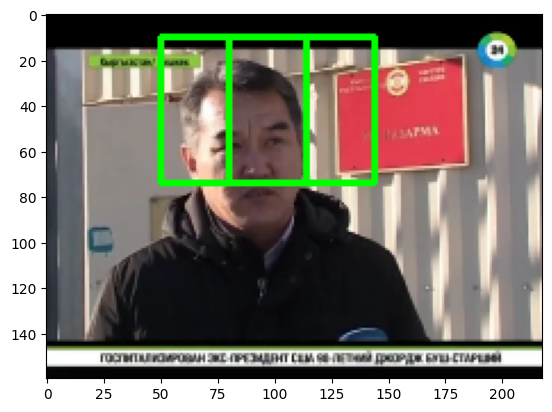

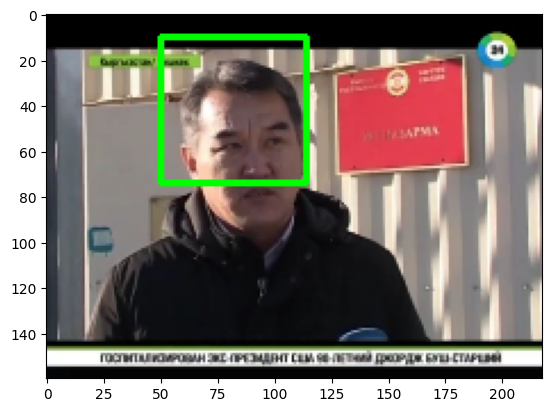

RGB
(480, 640, 3)
(160, 213)
{'Getting Subwindows': 0.0031986236572265625, 'Resizing Subwindows': 0.0014722347259521484, 'Normalize': 0.0013241767883300781, 'Extracting Features': 0.016300678253173828, 'Classifying': 0.015877246856689453, 'total': 0.03817296028137207}


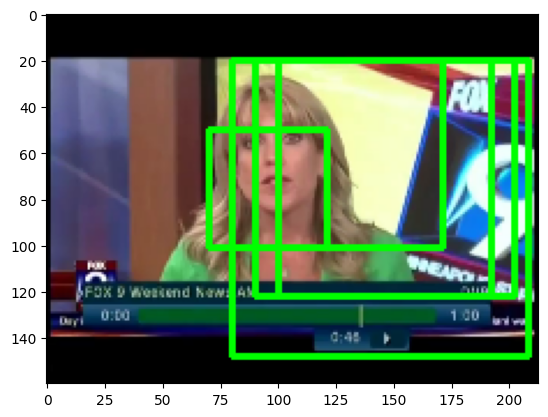

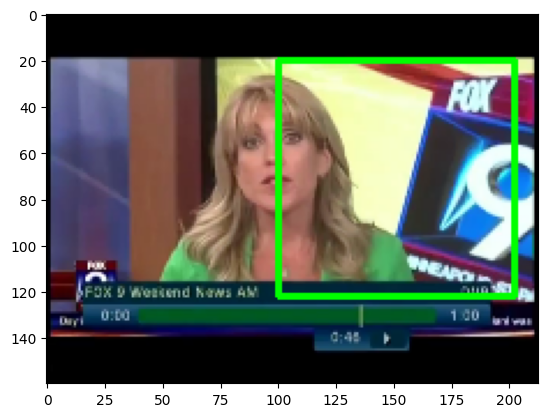

RGB
(720, 1280, 3)
(240, 426)
{'Getting Subwindows': 0.025237321853637695, 'Resizing Subwindows': 0.013167381286621094, 'Normalize': 0.0025777816772460938, 'Extracting Features': 0.028058290481567383, 'Classifying': 0.02669358253479004, 'total': 0.0957343578338623}


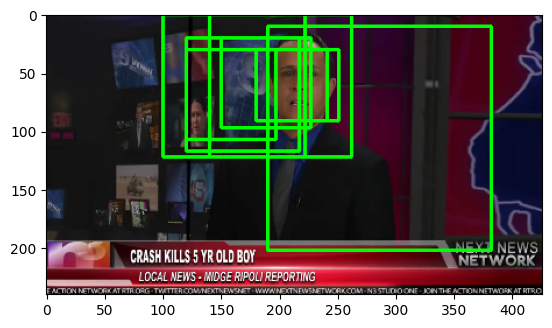

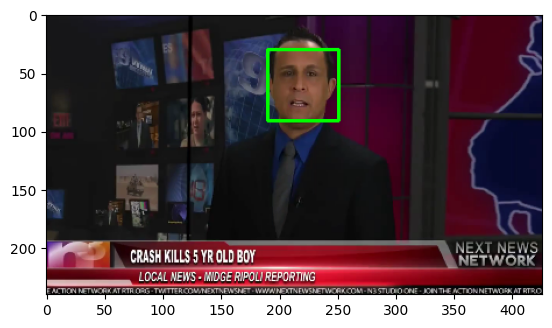

RGB
(720, 1280, 3)
(240, 426)
{'Getting Subwindows': 0.019506454467773438, 'Resizing Subwindows': 0.004625082015991211, 'Normalize': 0.0025260448455810547, 'Extracting Features': 0.02785038948059082, 'Classifying': 0.0302276611328125, 'total': 0.08473563194274902}


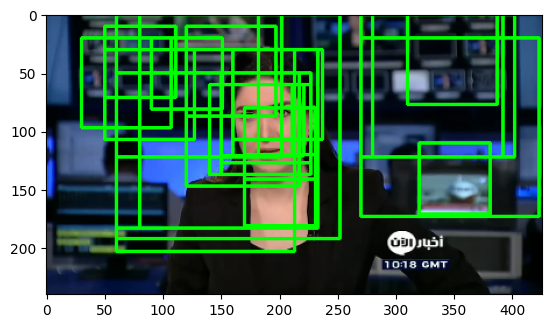

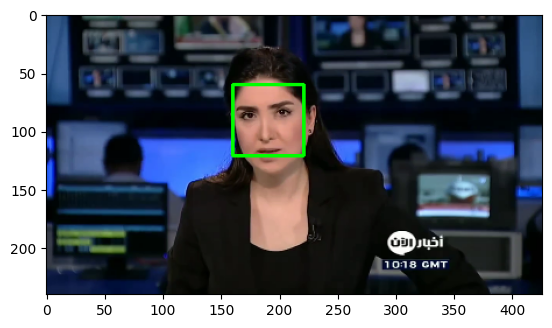

RGB
(480, 854, 3)
(160, 284)
{'Getting Subwindows': 0.031044721603393555, 'Resizing Subwindows': 0.0018076896667480469, 'Normalize': 0.0017533302307128906, 'Extracting Features': 0.01915764808654785, 'Classifying': 0.02155017852783203, 'total': 0.07531356811523438}


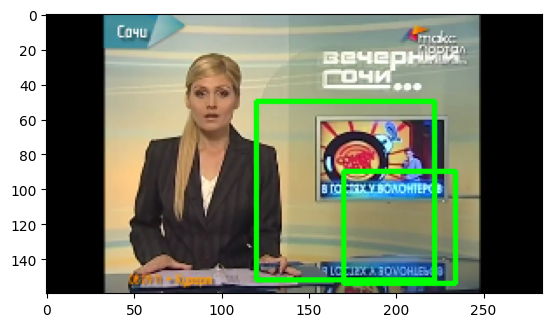

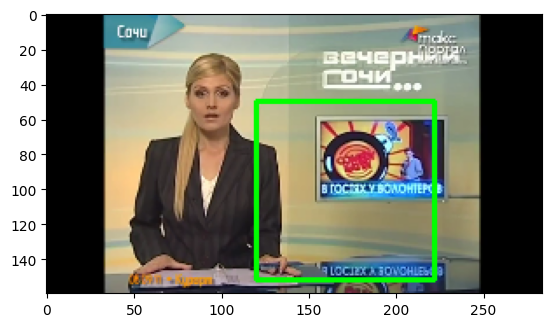

RGB
(480, 848, 3)
(160, 282)
{'Getting Subwindows': 0.0045337677001953125, 'Resizing Subwindows': 0.001787424087524414, 'Normalize': 0.0016906261444091797, 'Extracting Features': 0.017919063568115234, 'Classifying': 0.02107691764831543, 'total': 0.04700779914855957}


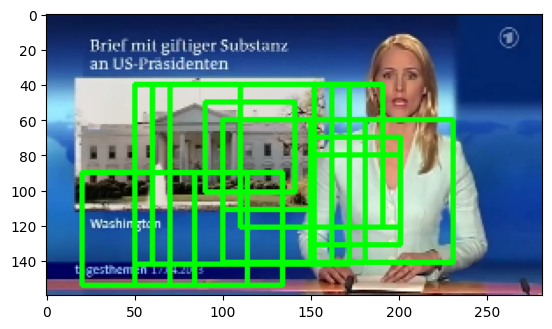

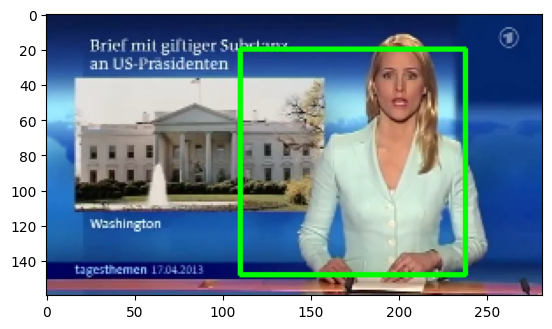

RGB
(480, 656, 3)
(160, 218)
{'Getting Subwindows': 0.003314971923828125, 'Resizing Subwindows': 0.0015420913696289062, 'Normalize': 0.0014083385467529297, 'Extracting Features': 0.017042875289916992, 'Classifying': 0.019843578338623047, 'total': 0.04315185546875}


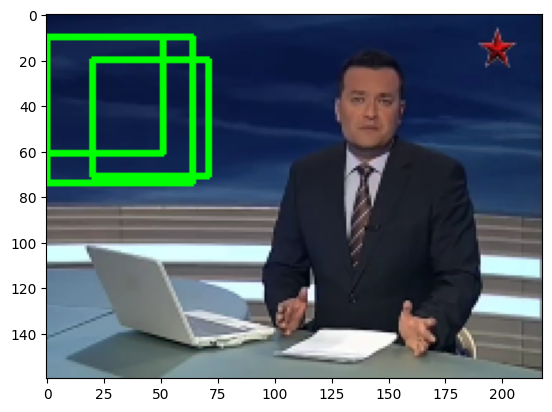

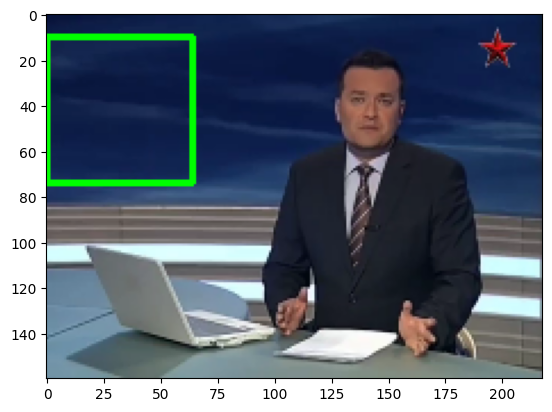

RGB
(720, 1280, 3)
(240, 426)
{'Getting Subwindows': 0.01802349090576172, 'Resizing Subwindows': 0.00446772575378418, 'Normalize': 0.0023758411407470703, 'Extracting Features': 0.0252072811126709, 'Classifying': 0.027952909469604492, 'total': 0.07802724838256836}


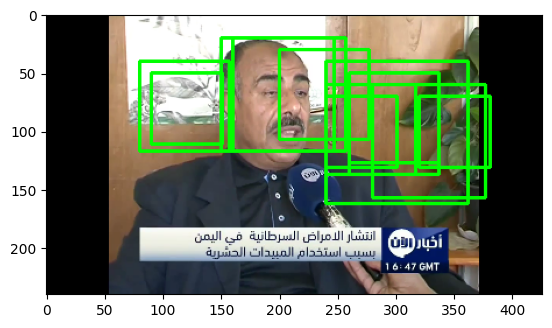

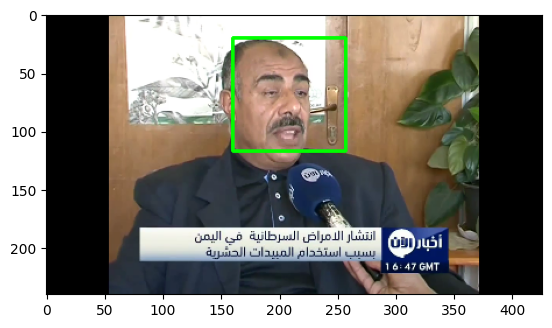

In [39]:
for i in show_images:
  # >>>> Read image <<<<
  img = Image.open(all_images_names[i])
  print(img.mode)
  img = np.array(img)
  print(img.shape)
  img = cv2.resize(img, (img.shape[1]//3, img.shape[0]//3))
  org_sh = img.shape
  if not rectangles_only:
    plt.imshow(img)
    plt.show()
  # get subwindows
  img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  print(img2.shape)

  # >>>> Normalize image <<<<
  # normalize image
  # img2 = (img2 - img2.mean()) / img2.std()
  # img2 = cv2.resize(img, resize_to)
  # print(img2.shape)

  # img2 = cv2.normalize(img2, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
  # resize image
  # img2 = cv2.resize(img2, (570, 380))

  # show image
  if not rectangles_only:
    plt.imshow(img2, cmap='gray')
    plt.show()

  # +++++++++++++++++++++
  # find face
  # >>>> Find face <<<<
  face_coordinates, region_max_conf, max_conf , timing=\
                  faceDetector.find_face(img2)
  print(timing)
  # region_max_conf *= img.shape[0] / resize_to[0]
  # ++++++++++++++++++++
  # rectangles
  # >>>> Draw rectangles <<<<
  tmp_img = img.copy()
  # for face_coordinate in face_coordinates:
  for x1, y1, x2, y2 in face_coordinates:
      cv2.rectangle(tmp_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
  # if not rectangles_only:
  plt.imshow(tmp_img)
  plt.show()

  # >>>> Draw rectangles with max confidence <<<<
  # amx confidence
  tmp_img = img.copy()
  x1, y1, x2, y2 = region_max_conf
  cv2.rectangle(tmp_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
  plt.imshow(tmp_img)
  plt.show()



In [ ]:
tmpX = faceDetector.classifier.X
faceDetector.classifier.X = None
joblib.dump(faceDetector, parent + 'faceDetector.joblib')
faceDetector.classifier.X = tmpX